===============================================  ABA FINANCEIRO

In [1]:
# Bloco 1 — Setup inicial e leitura da aba "Financeiro"

import pandas as pd
import numpy as np
import re
import unicodedata
from pathlib import Path

# Leitura do arquivo Excel
FILE_PATH = Path("data/dados.xlsx")

assert FILE_PATH.exists(), f"Arquivo não encontrado: {FILE_PATH.resolve()}"

# Leitura explícita da aba "Financeiro"
df_fin_raw = pd.read_excel(FILE_PATH, sheet_name="Financeiro", engine="openpyxl")

# Função utilitária para normalizar nomes de colunas
def preview_normalize_col(col: str) -> str:
    # remove acentos
    col_norm = unicodedata.normalize("NFKD", col)
    col_norm = "".join([c for c in col_norm if not unicodedata.combining(c)])
    # strip e colapsa espaços
    col_norm = re.sub(r"\s+", " ", col_norm.strip())
    return col_norm

cols_original = list(df_fin_raw.columns)
cols_preview_norm = [preview_normalize_col(c) for c in cols_original]

# Informações básicas
print("=== INFO BÁSICA: ABA Financeiro ===")
print(f"Arquivo: {FILE_PATH.name}")
print(f"Linhas x Colunas: {df_fin_raw.shape[0]} x {df_fin_raw.shape[1]}")
print("\nPrimeiras 5 linhas (visão geral):")
display(df_fin_raw.head(5))

print("\nTipos inferidos pelo pandas (dtypes):")
print(df_fin_raw.dtypes)

# Checagem de colunas (originais vs. normalizadas só para visual)
print("\nLista de colunas (originais):")
for i, c in enumerate(cols_original, 1):
    print(f"{i:02d}. {repr(c)}")

print("\nPrévia de normalização (sem aplicar ainda):")
for i, (o, n) in enumerate(zip(cols_original, cols_preview_norm), 1):
    print(f"{i:02d}. {repr(o)}  ->  {n}")

# Nulos por coluna
nulls = df_fin_raw.isna().sum().sort_values(ascending=False)
print("\nContagem de valores nulos por coluna (desc):")
print(nulls)

# Amostra aleatória pequena para detectar possíveis valores estranhos
print("\nAmostra aleatória de 3 linhas:")
display(df_fin_raw.sample(min(3, len(df_fin_raw)), random_state=42))

# Verificação de colunas potencialmente duplicadas por nome "visual" (ignorando acentos e múltiplos espaços)
def canonical_key(col: str) -> str:
    c = preview_normalize_col(col).lower()
    c = c.replace(" ", "_")
    return c

canonical_map = {}
dups = []
for c in cols_original:
    key = canonical_key(c)
    if key in canonical_map and c not in canonical_map[key]:
        dups.append((canonical_map[key][0], c, key))
        canonical_map[key].append(c)
    else:
        canonical_map.setdefault(key, []).append(c)

if dups:
    print("\nColunas potencialmente duplicadas (mesma chave canônica):")
    for a, b, k in dups:
        print(f"- {repr(a)}  ~ {repr(b)}  -> chave: {k}")
else:
    print("\nNão foram detectadas colunas potencialmente duplicadas por chave canônica.")

=== INFO BÁSICA: ABA Financeiro ===
Arquivo: dados.xlsx
Linhas x Colunas: 26743 x 34

Primeiras 5 linhas (visão geral):


,Depara Mêss,Diretoria,Marca,Tipo Consumo,Retornabilidade,Tamanho,Estado,Regional,Volume,Gross Revenue,...,GVV_Labor,GVV_T1,GVV_T2,GVV_ED,GVV_OthersGVV,GVV Total,Variable Margin,DME,Embalagem,Concatenate
0,2023-01-01,DISTRIBUIDORES DE AREA,CC,FUTURO (MS),DESCARTAVEL,1.0,SP,TERRIT. SP INT/MS,49410.0675,110006.952,...,1676.554,918.566,769.208,0.0,1280.598,4644.926,26825.392,1179.552,PET,1DESCARTAVEL
1,2023-01-01,DISTRIBUIDORES DE AREA,CC,FUTURO (MS),DESCARTAVEL,1.0,SP,TERRIT. SPM,1783.3275,3930.916,...,48.510,196.174,12.408,0.0,58.916,315.986,718.872,42.570,PET,1DESCARTAVEL
2,2023-01-01,DISTRIBUIDORES DE AREA,CC,FUTURO (MS),DESCARTAVEL,1.5,SP,TERRIT. SP INT/MS,271.0575,520.432,...,8.448,14.894,4.114,0.0,7.106,34.540,111.672,6.468,PET,"1,5DESCARTAVEL"
3,2023-01-01,DISTRIBUIDORES DE AREA,CC,FUTURO (MS),DESCARTAVEL,1.5,SP,TERRIT. SPM,3295.5975,7349.518,...,96.118,287.870,23.694,0.0,102.234,509.938,1836.010,78.672,PET,"1,5DESCARTAVEL"
4,2023-01-01,DISTRIBUIDORES DE AREA,CC,FUTURO (MS),RETORNAVEL,0.6,SP,TERRIT. SP INT/MS,12183.6825,20329.892,...,605.924,838.904,203.632,0.0,928.224,2576.574,3581.402,290.840,Vidro,"0,6RETORNAVEL"



Tipos inferidos pelo pandas (dtypes):
Depara Mêss        datetime64[ns]
Diretoria                  object
Marca                      object
Tipo Consumo               object
Retornabilidade            object
Tamanho                   float64
Estado                     object
Regional                   object
Volume                    float64
Gross Revenue             float64
Taxes                     float64
Discounts                 float64
Encargos                  float64
Net Revenue               float64
Other Revenue             float64
Total Revenue             float64
CVV_Concentrate           float64
CVV_Sweetener             float64
CVV_Pet                   float64
CVV_Can                   float64
CVV_Cap                   float64
CVV_Purcharses            float64
CVV_OtherRaw              float64
CVV Total                 float64
GVV_Labor                 float64
GVV_T1                    float64
GVV_T2                    float64
GVV_ED                    float64
GVV_Other

,Depara Mêss,Diretoria,Marca,Tipo Consumo,Retornabilidade,Tamanho,Estado,Regional,Volume,Gross Revenue,...,GVV_Labor,GVV_T1,GVV_T2,GVV_ED,GVV_OthersGVV,GVV Total,Variable Margin,DME,Embalagem,Concatenate
2393,2023-03-01,ON PREMISE,FANTA,FUTURO (MS),DESCARTAVEL,3.0,SP,TERRIT. MODERNO,14.265,19.338,...,0.242,0.308,0.968,0.0,0.198,1.716,4.268,0.550,PET,3DESCARTAVEL
943,2023-02-01,DISTRIBUIDORES DE AREA,CC MENOS AÇÚ,FUTURO (MS),DESCARTAVEL,2.0,SP,TERRIT. SP INT/MS,543046.545,968798.292,...,4848.954,5507.832,1892.022,0.0,19061.306,31310.070,248791.554,14599.420,PET,2DESCARTAVEL
24183,2025-03-01,EVENTUAIS,CC SEM AÇÚ,FUTURO (MS),DESCARTAVEL,1.0,SP,TERRIT. MG,159.300,421.366,...,30.470,8.624,33.330,0.0,4.444,76.846,146.410,1.826,PET,1DESCARTAVEL



Não foram detectadas colunas potencialmente duplicadas por chave canônica.


In [2]:
# Bloco 2 — Padronização de nomes e resumo exploratório inicial

# Função de padronização de nomes de colunas
def clean_colname(col: str) -> str:
    col = unicodedata.normalize("NFKD", col)
    col = "".join(c for c in col if not unicodedata.combining(c))
    col = col.strip().lower()
    col = re.sub(r"\s+", "_", col)            # espaços -> _
    col = re.sub(r"[^\w_]", "", col)          # remove caracteres especiais
    return col

# Aplicar a função às colunas
df_fin = df_fin_raw.copy()
df_fin.columns = [clean_colname(c) for c in df_fin.columns]

print("=== COLUNAS PADRONIZADAS ===")
for i, c in enumerate(df_fin.columns, 1):
    print(f"{i:02d}. {c}")

print("\nDimensão do dataframe:", df_fin.shape)

# Tipos de variáveis após a limpeza
print("\nTipos de dados após limpeza:")
print(df_fin.dtypes)

# Separar variáveis categóricas e numéricas
cat_cols = df_fin.select_dtypes(include="object").columns.tolist()
num_cols = df_fin.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nVariáveis categóricas ({len(cat_cols)}):")
print(cat_cols)

print(f"\nVariáveis numéricas ({len(num_cols)}):")
print(num_cols)

# Contagem de valores únicos para categóricas
print("\n=== VALORES ÚNICOS POR VARIÁVEL CATEGÓRICA ===")
for c in cat_cols:
    n_unique = df_fin[c].nunique()
    sample_vals = df_fin[c].dropna().unique()[:5]
    print(f"{c:20s}: {n_unique:4d} únicos | exemplos: {sample_vals}")

# Estatísticas descritivas básicas das variáveis numéricas
print("\n=== ESTATÍSTICAS DESCRITIVAS (numéricas) ===")
display(df_fin[num_cols].describe(percentiles=[0.01, 0.5, 0.99]).T)

# Verificar valores negativos ou zeros em colunas financeiras relevantes
cols_check = ["volume", "gross_revenue", "total_revenue", "variable_margin"]
for c in cols_check:
    if c in df_fin.columns:
        neg = (df_fin[c] < 0).sum()
        zero = (df_fin[c] == 0).sum()
        print(f"\n{c}: {neg} valores negativos | {zero} zeros")

=== COLUNAS PADRONIZADAS ===
01. depara_mess
02. diretoria
03. marca
04. tipo_consumo
05. retornabilidade
06. tamanho
07. estado
08. regional
09. volume
10. gross_revenue
11. taxes
12. discounts
13. encargos
14. net_revenue
15. other_revenue
16. total_revenue
17. cvv_concentrate
18. cvv_sweetener
19. cvv_pet
20. cvv_can
21. cvv_cap
22. cvv_purcharses
23. cvv_otherraw
24. cvv_total
25. gvv_labor
26. gvv_t1
27. gvv_t2
28. gvv_ed
29. gvv_othersgvv
30. gvv_total
31. variable_margin
32. dme
33. embalagem
34. concatenate

Dimensão do dataframe: (26743, 34)

Tipos de dados após limpeza:
depara_mess        datetime64[ns]
diretoria                  object
marca                      object
tipo_consumo               object
retornabilidade            object
tamanho                   float64
estado                     object
regional                   object
volume                    float64
gross_revenue             float64
taxes                     float64
discounts                 float64
encar

,count,mean,std,min,1%,50%,99%,max
tamanho,26743.0,1.287269,1.935304,0.200,0.20000,0.600,1.000000e+01,1.800000e+01
volume,26743.0,80768.465500,397728.551763,-391.950,1.41750,1055.655,1.327058e+06,8.287222e+06
gross_revenue,26743.0,201579.073882,855374.693946,-674.872,5.20124,3279.870,4.153582e+06,1.751825e+07
taxes,26743.0,67329.465081,276923.540639,-200.816,1.71600,1157.222,1.378744e+06,5.696622e+06
discounts,26743.0,8215.772701,42023.563501,-40817.898,0.00000,3.938,2.087545e+05,9.801163e+05
encargos,26743.0,1934.946442,8954.362193,-33.242,0.00000,5.808,4.639229e+04,2.243810e+05
net_revenue,26743.0,127968.778465,555292.302368,-3612.774,2.42924,2002.154,2.610605e+06,1.126061e+07
other_revenue,26743.0,586.481356,6077.440602,-134162.336,-3226.16580,4.532,1.293292e+04,2.183472e+05
total_revenue,26743.0,128555.259822,557982.730118,-3614.094,2.55200,2031.348,2.611047e+06,1.135041e+07
cvv_concentrate,26743.0,21994.260399,93153.804894,-1928.190,0.00000,347.886,4.400296e+05,1.971873e+06



volume: 21 valores negativos | 1 zeros

gross_revenue: 21 valores negativos | 0 zeros

total_revenue: 111 valores negativos | 0 zeros

variable_margin: 1252 valores negativos | 2 zeros


Valores únicos após padronização (exemplo):

diretoria:
['DISTRIBUIDORES DE AREA' 'EVENTUAIS' 'HOME MARKET' 'ON PREMISE'
 'TRADICIONAL']

marca:
['CC' 'CC CAFE' 'CC MENOS AÇÚ' 'CC SEM AÇÚ' 'CC ZERO' 'CCLIGHT' 'FANTA'
 'FANTA ZERO' 'FANTALAR' 'FANTAMAR' 'FANTAUVA' 'KUAT' 'MULMRCA'
 'SCHWEPPES' 'SCHWPSALE' 'SCHWPSORIG' 'SPRITE' 'SPRITE FRESH' 'SPRITE SEM'
 'SPRITE ZERO' 'CC MA IMPORT' 'CC IMPORT']

embalagem:
['PET' 'VIDRO' 'REF PET' 'LATA' 'BAG IN BOX']

Período coberto na base:
mínimo: 2023-01-01 | máximo: 2025-05-01


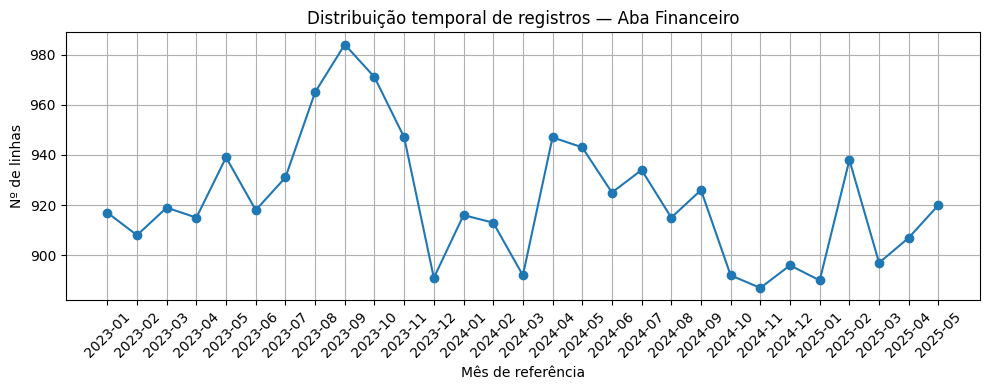

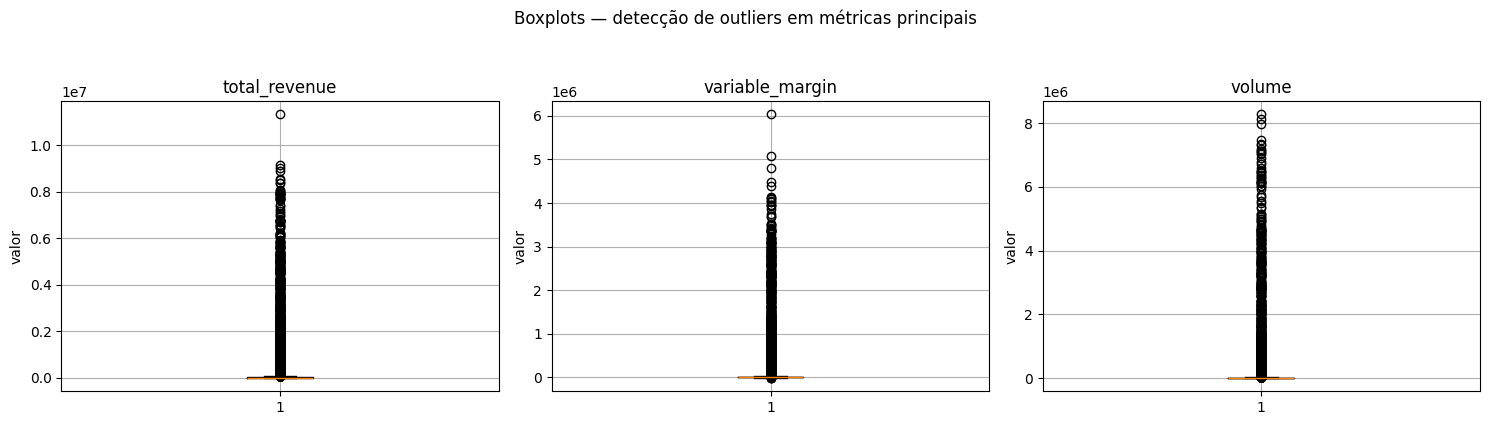


Resumo estatístico dos indicadores principais:


,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
total_revenue,26743.0,128555.259822,557982.730118,-3614.094,2.55200,10.8900,151.481,2031.348,30652.63300,568291.84720,2.611047e+06,1.135041e+07
variable_margin,26743.0,53852.712468,257696.936354,-22204.402,-451.93764,0.4202,35.871,511.808,9559.13200,224676.33760,1.100987e+06,6.044004e+06
volume,26743.0,80768.465500,397728.551763,-391.950,1.41750,5.1525,78.480,1055.655,15990.28875,383834.03625,1.327058e+06,8.287222e+06



Margem variável negativa em 1252 registros (4.68%).

Exemplo de 5 linhas com margem negativa:


,depara_mess,diretoria,marca,tipo_consumo,retornabilidade,tamanho,estado,regional,volume,gross_revenue,...,gvv_labor,gvv_t1,gvv_t2,gvv_ed,gvv_othersgvv,gvv_total,variable_margin,dme,embalagem,concatenate
11,2023-01-01,DISTRIBUIDORES DE AREA,CC,IMEDIATO (SS),DESCARTAVEL,0.22,SP,TERRIT. SP INT/MS,5836.8375,19672.950,...,616.044,788.656,225.016,0.0,156.244,1785.938,-2271.566,139.348,LATA,"0,22DESCARTAVEL"
12,2023-01-01,DISTRIBUIDORES DE AREA,CC,IMEDIATO (SS),DESCARTAVEL,0.22,SP,TERRIT. SPM,5336.2125,19747.398,...,465.762,1739.606,37.554,0.0,163.966,2406.866,-1940.158,127.380,LATA,"0,22DESCARTAVEL"
13,2023-01-01,DISTRIBUIDORES DE AREA,CC,IMEDIATO (SS),DESCARTAVEL,0.25,SP,TERRIT. SP INT/MS,133.1775,595.870,...,12.892,40.744,7.304,0.0,3.652,64.614,-48.906,3.168,VIDRO,"0,25DESCARTAVEL"
14,2023-01-01,DISTRIBUIDORES DE AREA,CC,IMEDIATO (SS),DESCARTAVEL,0.25,SP,TERRIT. SPM,1631.1600,7335.504,...,126.500,1574.386,11.352,0.0,52.712,1764.928,-1604.944,38.940,VIDRO,"0,25DESCARTAVEL"
15,2023-01-01,DISTRIBUIDORES DE AREA,CC,IMEDIATO (SS),DESCARTAVEL,0.31,SP,TERRIT. SP INT/MS,1435.1625,4750.372,...,181.324,22.946,67.716,0.0,39.754,311.740,-166.980,34.276,LATA,"0,31DESCARTAVEL"



Resumo final:
Dimensão: (26743, 34)
Período: 2023-01-01 -> 2025-05-01
Diretorias únicas: 5
Marcas únicas: 22
Tipos de consumo: ['FUTURO (MS)' 'IMEDIATO (SS)']

=== PADRONIZAÇÃO DAS 5 COLUNAS-CHAVE ===
Valores únicos nas colunas-chave:

marca (22 valores): ['CC', 'CC CAFE', 'CC IMPORT', 'CC MA IMPORT', 'CC MENOS AÇÚ', 'CC SEM AÇÚ', 'CC ZERO', 'CCLIGHT', 'FANTA', 'FANTA ZERO']

tamanho (18 valores): [np.float64(0.2), np.float64(0.22), np.float64(0.25), np.float64(0.29), np.float64(0.3), np.float64(0.31), np.float64(0.35), np.float64(0.51), np.float64(0.6), np.float64(1.0)]

tipo_consumo (2 valores): ['FUTURO (MS)', 'IMEDIATO (SS)']

retornabilidade (2 valores): ['DESCARTAVEL', 'RETORNAVEL']

embalagem (4 valores): ['ALUMINIO', 'BAG IN BOX', 'PET', 'VIDRO']

Total de SKUs únicos no Financeiro (chave robusta): 101
Total de registros no Financeiro: 26743

Amostra de 5 chaves SKU robustas:


,marca,tamanho,tipo_consumo,retornabilidade,embalagem,chave_sku
0,CC,1.0,FUTURO (MS),DESCARTAVEL,PET,CC|1.0|FUTURO (MS)|DESCARTAVEL|PET
1,CC,1.0,FUTURO (MS),DESCARTAVEL,PET,CC|1.0|FUTURO (MS)|DESCARTAVEL|PET
2,CC,1.5,FUTURO (MS),DESCARTAVEL,PET,CC|1.5|FUTURO (MS)|DESCARTAVEL|PET
3,CC,1.5,FUTURO (MS),DESCARTAVEL,PET,CC|1.5|FUTURO (MS)|DESCARTAVEL|PET
4,CC,0.6,FUTURO (MS),RETORNAVEL,VIDRO,CC|0.6|FUTURO (MS)|RETORNAVEL|VIDRO


In [3]:
# Bloco 3 — Limpeza semântica, coerência temporal e análise de outliers

import matplotlib.pyplot as plt

# =======================
# 1. Padronização textual das variáveis categóricas
# =======================
df_fin_clean = df_fin.copy()

for c in ["diretoria", "marca", "tipo_consumo", "retornabilidade", "estado", "regional", "embalagem"]:
    df_fin_clean[c] = (
        df_fin_clean[c]
        .astype(str)
        .str.strip()
        .str.upper()
        .str.replace(r"\s+", " ", regex=True)
        .str.replace("Â", "A")
        .str.replace("Ã", "A")
    )

print("Valores únicos após padronização (exemplo):")
for c in ["diretoria", "marca", "embalagem"]:
    print(f"\n{c}:")
    print(df_fin_clean[c].unique())

# =======================
# 2. Coerência temporal
# =======================
print("\nPeríodo coberto na base:")
print(f"mínimo: {df_fin_clean['depara_mess'].min().date()} | máximo: {df_fin_clean['depara_mess'].max().date()}")

# Verificar número de registros por mês
df_mes = (
    df_fin_clean.groupby(df_fin_clean["depara_mess"].dt.to_period("M"))
    .size()
    .reset_index(name="linhas")
)
df_mes["depara_mess"] = df_mes["depara_mess"].astype(str)

plt.figure(figsize=(10,4))
plt.plot(df_mes["depara_mess"], df_mes["linhas"], marker="o")
plt.xticks(rotation=45)
plt.title("Distribuição temporal de registros — Aba Financeiro")
plt.xlabel("Mês de referência")
plt.ylabel("Nº de linhas")
plt.grid(True)
plt.tight_layout()
plt.show()

# =======================
# 3. Detecção simples de outliers financeiros
# =======================
cols_valor = ["total_revenue", "variable_margin", "volume"]
fig, axes = plt.subplots(1, len(cols_valor), figsize=(15, 4))

for i, c in enumerate(cols_valor):
    axes[i].boxplot(df_fin_clean[c], vert=True, showfliers=True)
    axes[i].set_title(c)
    axes[i].set_ylabel("valor")
    axes[i].grid(True)

plt.suptitle("Boxplots — detecção de outliers em métricas principais", y=1.05)
plt.tight_layout()
plt.show()

# Estatísticas complementares
print("\nResumo estatístico dos indicadores principais:")
display(df_fin_clean[cols_valor].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99]).T)

# =======================
# 4. Checagem de coerência interna — Margem negativa
# =======================
neg_margin = df_fin_clean[df_fin_clean["variable_margin"] < 0]
perc_neg = len(neg_margin) / len(df_fin_clean) * 100
print(f"\nMargem variável negativa em {len(neg_margin)} registros ({perc_neg:.2f}%).")

# Exemplo de linhas com margem negativa
print("\nExemplo de 5 linhas com margem negativa:")
display(neg_margin.head(5))

# =======================
# 5. Resultado final do tratamento
# =======================
print("\nResumo final:")
print(f"Dimensão: {df_fin_clean.shape}")
print(f"Período: {df_fin_clean['depara_mess'].min().date()} -> {df_fin_clean['depara_mess'].max().date()}")
print(f"Diretorias únicas: {df_fin_clean['diretoria'].nunique()}")
print(f"Marcas únicas: {df_fin_clean['marca'].nunique()}")
print(f"Tipos de consumo: {df_fin_clean['tipo_consumo'].unique()}")

# =======================
# 6. PADRONIZAÇÃO DAS CHAVES PARA MERGE (VERSÃO ROBUSTA)
# =======================

print("\n=== PADRONIZAÇÃO DAS 5 COLUNAS-CHAVE ===")

# Padronizar EMBALAGEM (mapear para nomes consistentes) - JÁ FEITO
embalagem_map = {
    "VIDRO": "VIDRO",
    "LATA": "ALUMINIO", 
    "BAG IN BOX": "BAG IN BOX",
    "REF PET": "PET",
    "PET": "PET"
}
df_fin_clean["embalagem"] = df_fin_clean["embalagem"].replace(embalagem_map)

# Definir as 5 colunas-chave
chave_cols = ["marca", "tamanho", "tipo_consumo", "retornabilidade", "embalagem"]

print("Valores únicos nas colunas-chave:")
for col in chave_cols:
    unique_vals = sorted(df_fin_clean[col].unique())
    print(f"\n{col} ({len(unique_vals)} valores): {unique_vals[:10]}")

# Criar a chave composta robusta
# Garantir que todas as colunas sejam string antes de concatenar
df_fin_clean["chave_sku"] = (
    df_fin_clean["marca"].astype(str) + "|" + 
    df_fin_clean["tamanho"].astype(str) + "|" + 
    df_fin_clean["tipo_consumo"].astype(str) + "|" +
    df_fin_clean["retornabilidade"].astype(str) + "|" + 
    df_fin_clean["embalagem"].astype(str)
)

print(f"\nTotal de SKUs únicos no Financeiro (chave robusta): {df_fin_clean['chave_sku'].nunique()}")
print(f"Total de registros no Financeiro: {len(df_fin_clean)}")

# Amostra das chaves
print("\nAmostra de 5 chaves SKU robustas:")
display(df_fin_clean[chave_cols + ["chave_sku"]].head(5))

Conclusão geral da aba “Financeiro”

Estrutura de dados: estável, nenhum buraco temporal ou nulos.
Tipos de variável: corretos, numéricas e categóricas coerentes.
Outliers: presentes, mas esperados, distribuição típica de vendas.
Margem negativa: 4.68%, deve ser mantida como sinal de custo alto.
Padronização textual: completa.
Período: 2023–2025, série mensal contínua.

===============================================  ABA COMERCIAL 

In [4]:
# Bloco 4 - Leitura e diagnóstico da aba "Comercial"

# === Leitura explícita da aba ===
# CORREÇÃO: Forçar leitura da coluna "Mês/Ano" como string
df_com_raw = pd.read_excel(FILE_PATH, sheet_name="Comercial", engine="openpyxl", dtype={"Mês/Ano": str})

# Função de normalização apenas para inspecionar nomes
def preview_norm(col):
    col_norm = unicodedata.normalize("NFKD", col)
    col_norm = "".join(c for c in col_norm if not unicodedata.combining(c))
    col_norm = re.sub(r"\s+", " ", col_norm.strip())
    return col_norm

cols_orig = df_com_raw.columns.tolist()
cols_preview = [preview_norm(c) for c in cols_orig]

print("=== INFO BÁSICA: ABA Comercial ===")
print(f"Linhas x Colunas: {df_com_raw.shape[0]} x {df_com_raw.shape[1]}")

print("\nPrimeiras 5 linhas:")
display(df_com_raw.head(5))

print("\nTipos de dados inferidos:")
print(df_com_raw.dtypes)

# VERIFICAÇÃO ESPECÍFICA DA COLUNA Mês/Ano
print("\n=== VERIFICAÇÃO COLUNA Mês/Ano ===")
print(f"Tipo: {df_com_raw['Mês/Ano'].dtype}")
print(f"Primeiros valores: {df_com_raw['Mês/Ano'].head(5).tolist()}")
print(f"Valores únicos (amostra): {df_com_raw['Mês/Ano'].unique()[:10]}")

print("\nLista de colunas (originais):")
for i, c in enumerate(cols_orig, 1):
    print(f"{i:02d}. {repr(c)}")

print("\nPrévia de normalização (sem aplicar ainda):")
for o, n in zip(cols_orig, cols_preview):
    print(f"- {repr(o)} -> {n}")

# Contagem de nulos
print("\nContagem de valores nulos por coluna (desc):")
nulls_com = df_com_raw.isna().sum().sort_values(ascending=False)
print(nulls_com)

# Amostra aleatória para inspecionar formato dos valores
print("\nAmostra aleatória de 3 linhas:")
display(df_com_raw.sample(min(3, len(df_com_raw)), random_state=1))

# Detecção de colunas possivelmente duplicadas (nomes muito parecidos)
def canonical(col):
    c = preview_norm(col).lower().replace(" ", "_")
    return c

seen = {}
dups = []
for c in cols_orig:
    key = canonical(c)
    if key in seen and c not in seen[key]:
        dups.append((seen[key][0], c, key))
        seen[key].append(c)
    else:
        seen.setdefault(key, []).append(c)

if dups:
    print("\nColunas potencialmente duplicadas:")
    for a, b, k in dups:
        print(f"- {a!r} ~ {b!r}  → chave: {k}")
else:
    print("\nNenhuma coluna potencialmente duplicada por chave canônica.")

# =======================
# IDENTIFICAÇÃO DAS COLUNAS-CHAVE PARA MERGE
# =======================

print("\n=== IDENTIFICANDO COLUNAS-CHAVE NO COMERCIAL ===")

# Mapear colunas do Comercial para as equivalentes no Financeiro
colunas_chave_map = {
    "marca": ["Marca", "marca"],
    "tamanho": ["Tamanho", "tamanho"], 
    "tipo_consumo": ["Tipo Consumo", "tipo_consumo"],
    "embalagem": ["Embalagem", "embalagem"]
}

# Encontrar os nomes exatos das colunas no Comercial
colunas_chave_comercial = {}
for chave_fin, possiveis_nomes in colunas_chave_map.items():
    for nome in possiveis_nomes:
        if nome in df_com_raw.columns:
            colunas_chave_comercial[chave_fin] = nome
            break
    if chave_fin not in colunas_chave_comercial:
        print(f"ATENCAO: Coluna {chave_fin} nao encontrada no Comercial")

print("Colunas-chave identificadas no Comercial:")
for chave_fin, coluna_com in colunas_chave_comercial.items():
    print(f"- {chave_fin}: {coluna_com}")

# Verificar valores atuais das colunas-chave
print("\nVALORES ATUAIS DAS COLUNAS-CHAVE (amostra):")
for chave_fin, coluna_com in colunas_chave_comercial.items():
    valores_unicos = df_com_raw[coluna_com].dropna().unique()[:5]
    print(f"{coluna_com}: {list(valores_unicos)}")

=== INFO BÁSICA: ABA Comercial ===
Linhas x Colunas: 200487 x 14

Primeiras 5 linhas:


,Mês/Ano,Estado,Categoria BR,Sub Categoria,Marca,Embalagem,Tamanho,Retornabilidade,Tipo Consumo,Diretoria Estratégica,Diretoria Comercial,Território de Distribuição,Regionais,Vol MTD (UC)
0,01.2023,SP,REFRIG,COLAS,CC,VIDRO,20.3 Onz / 600 ML=CC,RETORNAVEL,CONSUMO IMEDIATO (SS,HOME MARKET,MODERNO,DISTR SP OESTE / MS,TERRIT. KA SPI/MS,467.88750
1,01.2023,SP,REFRIG,COLAS,CC,VIDRO,20.3 Onz / 600 ML=CC,RETORNAVEL,CONSUMO IMEDIATO (SS,HOME MARKET,TRADICIONAL,DISTR SUMARE & LITORAL,TERRIT. SP INT/MS,5.70600
2,01.2023,SP,REFRIG,COLAS,CC,VIDRO,20.3 Onz / 600 ML=CC,RETORNAVEL,CONSUMO IMEDIATO (SS,HOME MARKET,TRADICIONAL,Não atribuído,TERRIT. SPM,57.06450
3,01.2023,SP,REFRIG,COLAS,CC,VIDRO,20.3 Onz / 600 ML=CC,RETORNAVEL,CONSUMO IMEDIATO (SS,TRADICIONAL,TRADICIONAL,DISTR SP OESTE / MS,TERRIT. EVENT MG,5.70600
4,01.2023,SP,REFRIG,COLAS,CC,VIDRO,20.3 Onz / 600 ML=CC,RETORNAVEL,CONSUMO IMEDIATO (SS,TRADICIONAL,TRADICIONAL,DISTR SP OESTE / MS,TERRIT. SP INT/MS,74387.35575



Tipos de dados inferidos:
Mês/Ano                        object
Estado                         object
Categoria BR                   object
Sub Categoria                  object
Marca                          object
Embalagem                      object
Tamanho                        object
Retornabilidade                object
Tipo Consumo                   object
Diretoria Estratégica          object
Diretoria Comercial            object
Território de Distribuição     object
Regionais                      object
Vol MTD (UC)                  float64
dtype: object

=== VERIFICAÇÃO COLUNA Mês/Ano ===
Tipo: object
Primeiros valores: ['01.2023', '01.2023', '01.2023', '01.2023', '01.2023']
Valores únicos (amostra): ['01.2023' '02.2023' '03.2023' '04.2023' '05.2023' '06.2023' '07.2023'
 '08.2023' '09.2023' '10.2023']

Lista de colunas (originais):
01. 'Mês/Ano'
02. 'Estado'
03. 'Categoria BR'
04. 'Sub Categoria'
05. 'Marca'
06. 'Embalagem'
07. 'Tamanho'
08. 'Retornabilidade'
09. 'Tipo Con

,Mês/Ano,Estado,Categoria BR,Sub Categoria,Marca,Embalagem,Tamanho,Retornabilidade,Tipo Consumo,Diretoria Estratégica,Diretoria Comercial,Território de Distribuição,Regionais,Vol MTD (UC)
120239,06.2024,SP,AGUA,ÁGUA COM GÁS COM SABOR,CRYSTAL SP,PET,"510ml / 17,2oz",DESCARTAVEL,CONSUMO IMEDIATO (SS,ON PREMISE,TRADICIONAL,DISTR SUMARE & LITORAL,TERRIT. SPM,53.36100
165531,12.2024,SP,SNACKS,CHOCOLATE,BIS EXTRA,NAO BEBIDA,45GR,NAO BEBIDA,NAO BEBIDA,ON PREMISE,TRADICIONAL,DISTR SUMARE & LITORAL,TERRIT. SPM,1.71000
62956,10.2023,SP,REFRIG,SABORES,KUAT,PET,67.6 Onz / 2 LITROS,DESCARTAVEL,CONSUMO FUTURO (MS),ON PREMISE,TRADICIONAL,DISTR SP METROPOLE,TERRIT. SPM,1298.10825



Nenhuma coluna potencialmente duplicada por chave canônica.

=== IDENTIFICANDO COLUNAS-CHAVE NO COMERCIAL ===
Colunas-chave identificadas no Comercial:
- marca: Marca
- tamanho: Tamanho
- tipo_consumo: Tipo Consumo
- embalagem: Embalagem

VALORES ATUAIS DAS COLUNAS-CHAVE (amostra):
Marca: ['CC', 'CCLIGHT', 'CCLCAFF', 'CC ZERO', 'CC SEM AÇÚ']
Tamanho: ['20.3 Onz / 600 ML=CC', '33.8 Onz / 1 LITRO', '250ml  / 8,5oz', '290ml  / 9,8oz', '101.4 Onz / 3 LITROS']
Tipo Consumo: ['CONSUMO IMEDIATO (SS', 'CONSUMO FUTURO (MS)', 'NAO BEBIDA', 'Não atribuído']
Embalagem: ['VIDRO', 'PET', 'ALUMINIO', 'BAG IN BOX', 'BARRIL']


In [5]:
# Bloco 5 - padronização + extração de tamanho + checagens

import re
import unicodedata
import numpy as np
import pandas as pd

# =======================
# 1) Padronizar nomes de colunas (snake_case)
# =======================
def clean_colname(col: str) -> str:
    col = unicodedata.normalize("NFKD", col)
    col = "".join(c for c in col if not unicodedata.combining(c))
    col = col.strip().lower()
    col = re.sub(r"\s+", "_", col)          # espaços -> _
    col = re.sub(r"[^\w_]", "", col)        # remove caracteres especiais
    return col

df_com = df_com_raw.copy()
df_com.columns = [clean_colname(c) for c in df_com.columns]

print("=== COLUNAS PADRONIZADAS (Comercial) ===")
for i, c in enumerate(df_com.columns, 1):
    print(f"{i:02d}. {c}")
print("\nDimensão:", df_com.shape)

# =======================
# 2) Normalização textual básica (UPPER, trim, espaços colapsados)
# =======================
# Colunas-chave + colunas de texto que serão mantidas
text_cols = [
    "estado","diretoria_estrategica","diretoria_comercial","tamanho",
    "tipo_consumo","categoria_br","marca","sub_categoria",
    "territorio_de_distribuicao","retornabilidade","embalagem"
]
# Garantir que a coluna existe antes de tentar limpá-la
for c in text_cols:
    if c in df_com.columns:
        df_com[c] = (
            df_com[c]
            .astype(str)
            .str.strip()
            .str.replace(r"\s+", " ", regex=True)
            .str.upper()
        )

# =======================
# 3) Normalizar 'estado' para casar com a Financeiro (SP)
# =======================
estado_map = {
    "SAO PAULO": "SP",
    "SÃO PAULO": "SP",
}
df_com["estado"] = df_com["estado"].replace(estado_map)

# =======================
# 4) Normalizar 'tipo_consumo'
# =======================
df_com["tipo_consumo"] = (
    df_com["tipo_consumo"]
    .astype(str)
    .str.upper()
    .str.strip()
    .str.replace(r"^\s*CONSUMO\s+", "", regex=True)       # remove prefixo "CONSUMO "
    .str.replace(r"\s+", " ", regex=True)                 # colapsa espaços
    .str.replace(r"IMEDIATO\s*\(?\s*SS\)?", "IMEDIATO (SS)", regex=True) # Corrige typo (SS
    .str.replace(r"FUTURO\s*\(?\s*MS\)?", "FUTURO (MS)", regex=True)   # Corrige typo (MS
)

print("\nValores únicos — tipo_consumo (após normalização):", df_com["tipo_consumo"].unique())
print("Valores únicos — estado (após normalização):", df_com["estado"].unique())

# =======================
# 5) Extrair tamanho em LITROS para casar com Financeiro.tamanho (float)
# =======================
OZ_TO_ML = 29.5735

def parse_liters(s: str) -> float:
    if not isinstance(s, str):
        s = str(s)
    txt = s.upper()

    # a) litros
    m_l = re.search(r"(\d+(?:[\.,]\d+)?)\s*LITRO", txt)
    if m_l:
        val = float(m_l.group(1).replace(",", "."))
        return val

    # b) ml
    m_ml = re.search(r"(\d+(?:[\.,]\d+)?)\s*ML", txt)
    if m_ml:
        ml = float(m_ml.group(1).replace(",", "."))
        return ml / 1000.0

    # c) onz/oz (fallback)
    m_oz = re.search(r"(\d+(?:[\.,]\d+)?)\s*(ONZ|OZ|ONCA|ONCAS)", txt)
    if m_oz:
        oz = float(m_oz.group(1).replace(",", "."))
        return (oz * OZ_TO_ML) / 1000.0

    return np.nan

# Criar a nova coluna 'tamanho_l' (float) a partir da 'tamanho' (string)
df_com["tamanho_l"] = df_com["tamanho"].apply(parse_liters)

# =======================
# 6) Checagens da extração
# =======================
n_total = len(df_com)
n_ok = df_com["tamanho_l"].notna().sum()
n_nan = df_com["tamanho_l"].isna().sum()

print(f"\nExtração de tamanho em LITROS: OK={n_ok}  |  NaN={n_nan}  |  Cobertura={n_ok/n_total:.2%}")

# Amostra de linhas para validar parsing (origem x resultado)
print("\nAmostra de 10 linhas — tamanho (orig) -> tamanho_l (L):")
display(
    df_com[["tamanho","tamanho_l","retornabilidade","embalagem","marca"]]
    .drop_duplicates()
    .sample(min(10, len(df_com)), random_state=42)
)

# Mostrar possíveis padrões não reconhecidos
if n_nan > 0:
    print("\nExemplos de padrões NÃO reconhecidos (até 10):")
    display(
        df_com.loc[df_com["tamanho_l"].isna(), ["tamanho"]]
        .drop_duplicates()
        .head(10)
    )

# =======================
# 7) Preparar um dataframe 'df_com_clean' alinhado ao Financeiro para merge
# =======================

# se 'diretoria_estrategica' vier vazia/nula, preenche com 'diretoria_comercial'
mask_dir_vazia = df_com["diretoria_estrategica"].isna() | (df_com["diretoria_estrategica"].str.strip() == "")
df_com.loc[mask_dir_vazia, "diretoria_estrategica"] = df_com.loc[mask_dir_vazia, "diretoria_comercial"]


# === LÓGICA CORRIGIDA PARA EVITAR O BUG ===

# 1. DEFINIR AS COLUNAS QUE QUEREMOS MANTER
# Usamos os nomes PÓS-LIMPEZA (Etapa 1) e PÓS-CRIAÇÃO (Etapa 5)
# CRUCIAL: Selecionamos 'tamanho_l' (o float) e ignoramos 'tamanho' (a string)
cols_keep = [
    "mesano", "estado", "diretoria_estrategica", "marca", "tipo_consumo",
    "retornabilidade", "tamanho_l", # <-- USAR A COLUNA NOVA (float)
    "embalagem",
    "categoria_br", "sub_categoria",
    "territorio_de_distribuicao", "vol_mtd_uc",
    "diretoria_comercial",
    "regionais"
]

# 2. SELECIONAR AS COLUNAS PRIMEIRO
# Isso já elimina a coluna 'tamanho' (string) original e ambígua
df_com_clean = df_com[cols_keep].copy()

# 3. AGORA RENOMEAR PARA BATER COM O FINANCEIRO
# Não há mais conflito, pois a coluna 'tamanho' (string) não existe mais
df_com_clean = df_com_clean.rename(columns={
    "mesano": "depara_mess",
    "diretoria_estrategica": "diretoria",
    "tamanho_l": "tamanho" # <-- Agora é seguro renomear 'tamanho_l' para 'tamanho'
})
# =======================
# FIM DA CORREÇÃO
# =======================


# =======================
# 8) Ajustes finais de tipo - DATAS
# =======================

print("\n=== CONVERSÃO DE DATAS ===")
print(f"Tipo atual de depara_mess: {df_com_clean['depara_mess'].dtype}")
print(f"Amostra de valores: {df_com_clean['depara_mess'].head(5).tolist()}")

# Converter datas diretamente (agora já estão como string no formato MM.YYYY)
df_com_clean["depara_mess"] = pd.to_datetime(
    df_com_clean["depara_mess"], 
    format="%m.%Y",
    errors="coerce"
)

# Verificar resultado
n_datas_invalidas = df_com_clean["depara_mess"].isna().sum()
if n_datas_invalidas > 0:
    print(f"Atenção: {n_datas_invalidas} datas não puderam ser convertidas")
else:
    print("Todas as datas convertidas com sucesso!")

print("\n=== RESUMO df_com_clean ===")
print("Shape:", df_com_clean.shape)
print("Dtypes:")
print(df_com_clean.dtypes)

print("\nChecagem de valores únicos (amostra):")
for c in ["diretoria","tipo_consumo","retornabilidade","embalagem"]:
    if c in df_com_clean.columns:
        print(f"- {c}: {df_com_clean[c].nunique()} únicos | exemplos: {df_com_clean[c].unique()[:5]}")

print("\nDistribuição de 'tamanho' (L) — estatísticas:")
display(df_com_clean["tamanho"].describe(percentiles=[0.01,0.5,0.99]))

# =======================
# 9) Verificar compatibilidade com Financeiro para as chaves
# =======================
def uniq_intersection(col_fin, col_com):
    # Acessar as colunas (Series) dos dataframes
    # Esta função agora funcionará, pois df_com_clean['tamanho'] é uma Series
    inter = sorted(set(df_fin_clean[col_fin].unique()) & set(df_com_clean[col_com].unique()))
    return inter[:10], len(inter)

# O dataframe df_fin_clean é do Bloco 3
checks = {
    "estado": uniq_intersection("estado", "estado"),
    "diretoria": uniq_intersection("diretoria", "diretoria"),
    "marca": uniq_intersection("marca", "marca"),
    "tipo_consumo": uniq_intersection("tipo_consumo", "tipo_consumo"),  
    "retornabilidade": uniq_intersection("retornabilidade", "retornabilidade"),
    "embalagem": uniq_intersection("embalagem", "embalagem"),
    "tamanho": uniq_intersection("tamanho", "tamanho"), # <-- ISTO AGORA FUNCIONARÁ
}

print("\n=== INTERSEÇÕES COM FINANCEIRO (amostra, tamanho) ===")
for k, (sample_vals, n) in checks.items():
    print(f"- {k}: {n} valores em comum | amostra: {sample_vals}")

print("\nPeríodo Comercial:", df_com_clean['depara_mess'].min().date(), "->", df_com_clean['depara_mess'].max().date())
print("Período Financeiro:", df_fin_clean['depara_mess'].min().date(), "->", df_fin_clean['depara_mess'].max().date())

=== COLUNAS PADRONIZADAS (Comercial) ===
01. mesano
02. estado
03. categoria_br
04. sub_categoria
05. marca
06. embalagem
07. tamanho
08. retornabilidade
09. tipo_consumo
10. diretoria_estrategica
11. diretoria_comercial
12. territorio_de_distribuicao
13. regionais
14. vol_mtd_uc

Dimensão: (200487, 14)

Valores únicos — tipo_consumo (após normalização): ['IMEDIATO (SS)' 'FUTURO (MS)' 'NAO BEBIDA' 'NÃO ATRIBUÍDO']
Valores únicos — estado (após normalização): ['SP']

Extração de tamanho em LITROS: OK=164549  |  NaN=35938  |  Cobertura=82.07%

Amostra de 10 linhas — tamanho (orig) -> tamanho_l (L):


,tamanho,tamanho_l,retornabilidade,embalagem,marca
2943,16 ONZ / 473 ML=CC,0.473,DESCARTAVEL,ALUMINIO,ESTRELLAGA
7399,10.48 ONZ / 310 ML=C,0.310,DESCARTAVEL,ALUMINIO,CC SEM AÇÚ
5741,18 GR,NaN,NAO BEBIDA,CAIXA DE PAPELÃO,AMOR
1647,11.8ONZ/350ML=CC,0.350,DESCARTAVEL,ALUMINIO,SCHWPS
2091,67.6 ONZ / 2 LITROS,2.000,DESCARTAVEL,PET,KUAT
86654,1 LITRO,1.000,DESCARTAVEL,VIDRO,JIM BEAM
2127,11.8ONZ/350ML=CC,0.350,DESCARTAVEL,ALUMINIO,KUAT
4540,33.8 ONZ / 1 LITRO,1.000,DESCARTAVEL,PET,BURN
4378,6.8 ONZ / 200 ML=CC,0.200,DESCARTAVEL,TETRAPACK,KAPO
88230,35GR,NaN,NAO BEBIDA,NAO BEBIDA,OREO



Exemplos de padrões NÃO reconhecidos (até 10):


,tamanho
5134,21GR
5148,38GR
5176,40 GR
5198,41GR
5218,28GR
5221,27.5GR
5225,14 GR
5239,9GR
5264,56GR
5289,16GR



=== CONVERSÃO DE DATAS ===
Tipo atual de depara_mess: object
Amostra de valores: ['01.2023', '01.2023', '01.2023', '01.2023', '01.2023']
Todas as datas convertidas com sucesso!

=== RESUMO df_com_clean ===
Shape: (200487, 14)
Dtypes:
depara_mess                   datetime64[ns]
estado                                object
diretoria                             object
marca                                 object
tipo_consumo                          object
retornabilidade                       object
tamanho                              float64
embalagem                             object
categoria_br                          object
sub_categoria                         object
territorio_de_distribuicao            object
vol_mtd_uc                           float64
diretoria_comercial                   object
regionais                             object
dtype: object

Checagem de valores únicos (amostra):
- diretoria: 5 únicos | exemplos: ['HOME MARKET' 'TRADICIONAL' 'ON PREMISE' 'DISTR

count    164549.000000
mean          0.978726
std           2.454208
min           0.150000
1%            0.175000
50%           0.500000
99%           5.000000
max          50.000000
Name: tamanho, dtype: float64


=== INTERSEÇÕES COM FINANCEIRO (amostra, tamanho) ===
- estado: 1 valores em comum | amostra: ['SP']
- diretoria: 5 valores em comum | amostra: ['DISTRIBUIDORES DE AREA', 'EVENTUAIS', 'HOME MARKET', 'ON PREMISE', 'TRADICIONAL']
- marca: 9 valores em comum | amostra: ['CC', 'CC SEM AÇÚ', 'CC ZERO', 'CCLIGHT', 'FANTA', 'KUAT', 'MULMRCA', 'SPRITE', 'SPRITE SEM']
- tipo_consumo: 2 valores em comum | amostra: ['FUTURO (MS)', 'IMEDIATO (SS)']
- retornabilidade: 2 valores em comum | amostra: ['DESCARTAVEL', 'RETORNAVEL']
- embalagem: 4 valores em comum | amostra: ['ALUMINIO', 'BAG IN BOX', 'PET', 'VIDRO']
- tamanho: 17 valores em comum | amostra: [np.float64(0.2), np.float64(0.22), np.float64(0.25), np.float64(0.29), np.float64(0.3), np.float64(0.31), np.float64(0.35), np.float64(0.51), np.float64(0.6), np.float64(1.0)]

Período Comercial: 2023-01-01 -> 2025-05-01
Período Financeiro: 2023-01-01 -> 2025-05-01


In [6]:
# Bloco 6 - Harmonização de Embalagem e Filtragem de Dados Inválidos

print(f"Linhas ANTES da filtragem: {len(df_com_clean)}")

# =======================
# 1. Harmonizar EMBALAGEM (usando o mesmo 'map' do Bloco 3)
# =======================

embalagem_map = {
    "VIDRO": "VIDRO",
    "LATA": "ALUMINIO", # tem que checar
    "BAG IN BOX": "BAG IN BOX",
    "REF PET": "PET", # tem que checar
    "PET": "PET",
    "ALUMINIO": "ALUMINIO" # Garantir que o valor já limpo se mantenha
    # O restante (ex: 'BARRIL', 'CAIXA DE PAPELÃO') será mapeado para NaN
}

# Aplicar o mapeamento. 
# .map() para que valores não encontrados virem NaN
df_com_clean["embalagem"] = df_com_clean["embalagem"].map(embalagem_map)

print(f"Valores de Embalagem após harmonização: {df_com_clean['embalagem'].unique()}")

# =======================
# 2. Filtrar o 'df_com_clean' para manter APENAS linhas "processáveis"
# =======================
# Definir as categorias válidas (que existem no Financeiro)
valid_tipo_consumo = ['IMEDIATO (SS)', 'FUTURO (MS)']
valid_retornabilidade = ['RETORNAVEL', 'DESCARTAVEL']
# valid_embalagens não é mais necessário aqui, pois o .map() já tratou disso
# e os NaN serão filtrados a seguir.

# Aplicar os filtros
df_com_filtrado = df_com_clean[
    (df_com_clean["tamanho"].notna()) &                               # 1. Remove Snacks (tamanho NaN)
    (df_com_clean["marca"].notna()) &                                 # 2. Remove Marcas Nulas (que vimos no Bloco 4)
    (df_com_clean["tipo_consumo"].isin(valid_tipo_consumo)) &         # 3. Mantém só tipos de consumo válidos
    (df_com_clean["retornabilidade"].isin(valid_retornabilidade)) &   # 4. Mantém só retornabilidades válidas
    (df_com_clean["embalagem"].notna())                               # 5. Remove embalagens que não foram mapeadas (ex: BARRIL)
].copy()

print(f"\nLinhas APÓS a filtragem (prontas para 'De-Para'): {len(df_com_filtrado)}")

# =======================
# 3. Resultado (sem agregação)
# =======================

print("\n=== FILTRAGEM CONCLUÍDA ===")
print("O Dataframe 'df_com_filtrado' está limpo e pronto para as próximas etapas de 'De-Para' (Marca e Território).")
print(f"Shape do DF Comercial Filtrado: {df_com_filtrado.shape}")

print("\nAmostra do DF Comercial Filtrado:")
display(df_com_filtrado.head())

print("\nValores únicos restantes (pós-filtro):")
print(f"- Embalagens: {df_com_filtrado['embalagem'].unique()}")
print(f"- Tipo Consumo: {df_com_filtrado['tipo_consumo'].unique()}")
print(f"- Retornabilidade: {df_com_filtrado['retornabilidade'].unique()}")

Linhas ANTES da filtragem: 200487
Valores de Embalagem após harmonização: ['VIDRO' 'PET' 'ALUMINIO' 'BAG IN BOX' nan]

Linhas APÓS a filtragem (prontas para 'De-Para'): 144831

=== FILTRAGEM CONCLUÍDA ===
O Dataframe 'df_com_filtrado' está limpo e pronto para as próximas etapas de 'De-Para' (Marca e Território).
Shape do DF Comercial Filtrado: (144831, 14)

Amostra do DF Comercial Filtrado:


,depara_mess,estado,diretoria,marca,tipo_consumo,retornabilidade,tamanho,embalagem,categoria_br,sub_categoria,territorio_de_distribuicao,vol_mtd_uc,diretoria_comercial,regionais
0,2023-01-01,SP,HOME MARKET,CC,IMEDIATO (SS),RETORNAVEL,0.6,VIDRO,REFRIG,COLAS,DISTR SP OESTE / MS,467.88750,MODERNO,TERRIT. KA SPI/MS
1,2023-01-01,SP,HOME MARKET,CC,IMEDIATO (SS),RETORNAVEL,0.6,VIDRO,REFRIG,COLAS,DISTR SUMARE & LITORAL,5.70600,TRADICIONAL,TERRIT. SP INT/MS
2,2023-01-01,SP,HOME MARKET,CC,IMEDIATO (SS),RETORNAVEL,0.6,VIDRO,REFRIG,COLAS,NÃO ATRIBUÍDO,57.06450,TRADICIONAL,TERRIT. SPM
3,2023-01-01,SP,TRADICIONAL,CC,IMEDIATO (SS),RETORNAVEL,0.6,VIDRO,REFRIG,COLAS,DISTR SP OESTE / MS,5.70600,TRADICIONAL,TERRIT. EVENT MG
4,2023-01-01,SP,TRADICIONAL,CC,IMEDIATO (SS),RETORNAVEL,0.6,VIDRO,REFRIG,COLAS,DISTR SP OESTE / MS,74387.35575,TRADICIONAL,TERRIT. SP INT/MS



Valores únicos restantes (pós-filtro):
- Embalagens: ['VIDRO' 'PET' 'ALUMINIO' 'BAG IN BOX']
- Tipo Consumo: ['IMEDIATO (SS)' 'FUTURO (MS)']
- Retornabilidade: ['RETORNAVEL' 'DESCARTAVEL']


In [7]:
# Bloco 7 - De-para de Territórios Regionais

import re
import unicodedata

print(f"Linhas em 'df_com_filtrado': {len(df_com_filtrado)}")

# =======================
# 1. Definir o Dicionário de Mapeamento Geográfico
# =======================
# Baseado na tabela "De-Para" (Zona -> Desc_Regionais) fornecida pela FEMSA
mapa_territorio = {
    'TERRIT. DISTR': 'TERRIT. DISTR',
    'TERRIT. EVENT MG': 'TERRIT. MG',
    'TERRIT. DISTR MG': 'TERRIT. MG',
    'TERRIT. MG': 'TERRIT. MG',
    'TERRIT. KA RIO': 'TERRIT. MG',
    'TERRIT. KA CSTORE SP': 'TERRIT. MODERNO',
    'TERRIT. KA METRO': 'TERRIT. MODERNO',
    'TERRIT. OP METRO': 'TERRIT. MODERNO',
    'TERRIT. KA INT/LIT': 'TERRIT. MODERNO',
    'TERRIT. OP SUMARE': 'TERRIT. MODERNO',
    'TERRIT. PRE VALE/RIO': 'TERRIT. MODERNO',
    'TERRIT. PRE METRO': 'TERRIT. MODERNO',
    'TERRIT. PRE INT/LIT': 'TERRIT. MODERNO',
    'TERRIT. OP ABC/LIT': 'TERRIT. MODERNO',
    'TERRIT. KA ABC/LIT': 'TERRIT. MODERNO',
    'TERRIT. KA SC': 'TERRIT. MODERNO',
    'TERRIT. OP MG': 'TERRIT. MODERNO',
    'TERRIT. KA MG': 'TERRIT. MODERNO',
    'TERRIT. OP SC': 'TERRIT. MODERNO',
    'TERRIT. PRE MG': 'TERRIT. MODERNO',
    'TERRIT. OP RS': 'TERRIT. MODERNO',
    'TERRIT. KA RS INT': 'TERRIT. MODERNO',
    'TERRIT. OP SP OES/MS': 'TERRIT. MODERNO',
    'TERRIT. KA PR CTA': 'TERRIT. MODERNO',
    'TERRIT. KA PR INT': 'TERRIT. MODERNO',
    'TERRIT. OP PR': 'TERRIT. MODERNO',
    'TERRIT. PRE PR': 'TERRIT. MODERNO',
    'TERRIT. KA SP NOR/MS': 'TERRIT. MODERNO',
    'TERRIT. PARANA': 'TERRIT. PARANA',
    'TERRIT. DISTR MS/PR': 'TERRIT. SP INT/MS',
    'TERRIT. KA SP OESTE': 'TERRIT. SP INT/MS',
    'TERRIT. SP INT/MS': 'TERRIT. SP INT/MS',
    'TERRIT. SPM': 'TERRIT. SPM',
    'TERRIT. EVENT SPM': 'TERRIT. SPM',
    'TERRIT. OP VALE/RIO': 'TERRIT. SPM',
    'TERRIT. DISTR SP': 'TERRIT. SPM',
    'NÃO ATRIBUÍDO': 'TERRIT. SPM', # Mapeando o "Não atribuído" que estava no "De-Para"
    'SPI- SÃO PAULO INTER': 'TERRIT. SPM',
    'SPN- SÃO PAULO NORTE': 'TERRIT. SPM',
    'SPS- SÃO PAULO SUL': 'TERRIT. SPM',
    'TERRIT. DISTR SUL': 'TERRIT. SUL',
    'TERRIT. EVENT SUL': 'TERRIT. SUL',
    'TERRIT. SUL': 'TERRIT. SUL',
    'TERRIT. KA MESP SUL': 'TERRIT. SUL',
    'TERRIT. EVENT SUL': 'TERRIT. SUL', # Lidando com o espaço extra no "De-Para"
    'TERRIT. SC': 'TERRIT. SUL'
}

# =======================
# 2. Limpar a coluna 'regionais' (Comercial) antes de mapear
# =======================
def clean_regionais(col):
    if not isinstance(col, str):
        return str(col)
    
    # Normaliza (remove acentos)
    col = unicodedata.normalize("NFKD", col)
    col = "".join(c for c in col if not unicodedata.combining(c))
    
    # Remove \xa0 (non-breaking space) e espaços extras, e capitaliza
    col = re.sub(r"\s+", " ", col.replace(u"\xa0", " ")).strip().upper()
    
    # Corrigir nomes que vimos na tabela "De-Para"
    col = col.replace("SPI- SAO PAULO INTER", "SPI- SÃO PAULO INTER")
    col = col.replace("SPN- SAO PAULO NORTE", "SPN- SÃO PAULO NORTE")
    col = col.replace("SPS- SAO PAULO SUL", "SPS- SÃO PAULO SUL")
    
    return col

# Aplicar a limpeza
df_com_filtrado['regionais_clean'] = df_com_filtrado['regionais'].apply(clean_regionais)

# =======================
# 3. Aplicar o Mapeamento
# =======================
# Criar a nova coluna que BATE com a coluna 'regional' do Financeiro
df_com_filtrado['regional_harmonizada'] = df_com_filtrado['regionais_clean'].map(mapa_territorio)

# =======================
# 4. Verificar o Resultado
# =======================
n_mapeados = df_com_filtrado['regional_harmonizada'].notna().sum()
n_nao_mapeados = df_com_filtrado['regional_harmonizada'].isna().sum()

print(f"\n--- Resultado do Mapeamento ---")
print(f"Total de linhas: {len(df_com_filtrado)}")
print(f"Linhas Mapeadas: {n_mapeados} ({(n_mapeados/len(df_com_filtrado)):.2%})")
print(f"Linhas Não Mapeadas (NaN): {n_nao_mapeados}")

# Mostrar quais valores de 'regionais' falharam no mapeamento
if n_nao_mapeados > 0:
    print("\nValores de 'regionais' que falharam no mapeamento (amostra):")
    valores_falhados = df_com_filtrado[df_com_filtrado['regional_harmonizada'].isna()]['regionais_clean'].unique()
    print(valores_falhados[:20]) # Mostra os primeiros 20 que falharam

# =======================
# 5. Validar Interseção com o Financeiro
# =======================
# Nossos alvos (do df_fin_clean)
alvo_regionais = set(df_fin_clean['regional'].unique())

# Nossos resultados (do df_com_filtrado)
resultado_regionais = set(df_com_filtrado['regional_harmonizada'].dropna().unique())

print("\n--- Validação com Financeiro ---")
print(f"Alvos no Financeiro (6): {sorted(alvo_regionais)}")
print(f"Resultados no Comercial: {sorted(resultado_regionais)}")

# Verificar se todos os resultados estão no alvo
if resultado_regionais.issubset(alvo_regionais):
    print("✅ SUCESSO: Todos os territórios mapeados existem na base Financeiro.")
else:
    print("⚠️ ATENÇÃO: Mapeamos para territórios que NÃO existem no Financeiro.")
    print(f"   Valores problemáticos: {resultado_regionais - alvo_regionais}")

# Verificar se algum alvo ficou de fora (ex: 'TERRIT. DISTR' do mapa)
if not alvo_regionais.issubset(resultado_regionais):
    print(f"⚠️ AVISO: Não encontramos correspondência para todos os alvos do Financeiro.")
    print(f"   Alvos faltantes: {alvo_regionais - resultado_regionais}")

Linhas em 'df_com_filtrado': 144831

--- Resultado do Mapeamento ---
Total de linhas: 144831
Linhas Mapeadas: 132716 (91.64%)
Linhas Não Mapeadas (NaN): 12115

Valores de 'regionais' que falharam no mapeamento (amostra):
['TERRIT. KA SPI/MS' 'TERRIT. OP SPO/MS' 'NAO ATRIBUIDO' 'TERRIT. RS']

--- Validação com Financeiro ---
Alvos no Financeiro (6): ['TERRIT. MG', 'TERRIT. MODERNO', 'TERRIT. PARANA', 'TERRIT. SP INT/MS', 'TERRIT. SPM', 'TERRIT. SUL']
Resultados no Comercial: ['TERRIT. MG', 'TERRIT. MODERNO', 'TERRIT. PARANA', 'TERRIT. SP INT/MS', 'TERRIT. SPM', 'TERRIT. SUL']
✅ SUCESSO: Todos os territórios mapeados existem na base Financeiro.


In [8]:
# Bloco 8 - De-Para de Marcas

import numpy as np

# ===================================================================
# PARTE 1: Limpeza do Alvo (Aplicando suas novas regras ao FINANCEIRO)
# ===================================================================

print("--- 1. Limpando a base Financeiro (Alvo) ---")

# Dicionário com as novas regras de agrupamento
mapa_marca_financeiro = {
    # Agrupar em 'CC'
    'CC IMPORT': 'CC',
    'CC MA IMPORT': 'CC',
    'CC MENOS AÇÚ': 'CC',
    
    # Agrupar em 'FANTA'
    'FANTALAR': 'FANTA',
    'FANTAMAR': 'FANTA',
    'FANTAUVA': 'FANTA',
    
    # Agrupar em 'SCHWEPPES'
    'SCHWPSORIG': 'SCHWEPPES'
    
    # Marcas que não estão no mapa (ex: 'CC CAFE', 'FANTA ZERO') 
    # continuarão como elas mesmas.
}

# Aplicar o mapeamento
df_fin_clean['marca'] = df_fin_clean['marca'].replace(mapa_marca_financeiro)

print(f"Marcas únicas no Financeiro (APÓS agrupamento): {df_fin_clean['marca'].nunique()}")


# ===================================================================
# PARTE 2: Diagnóstico e Mapeamento da Origem (COMERCIAL)
# ===================================================================

# --- 2a. Diagnóstico (Re-executando o Bloco 8) ---

print("\n--- 2a. Diagnóstico (Pós-Limpeza) ---")

# 1. Alvos (Financeiro - agora limpo)
fin_marcas_limpas = df_fin_clean['marca'].unique()
print(f"Alvos em 'Financeiro': {len(fin_marcas_limpas)} opções")
print(sorted(fin_marcas_limpas))

# 2. Origens (Comercial - REFRIG)
df_com_refrig = df_com_filtrado[df_com_filtrado['categoria_br'] == 'REFRIG']
refrig_marcas_com = df_com_refrig['marca'].unique()
print(f"Origens em 'Comercial (REFRIG)': {len(refrig_marcas_com)} opções")
print(sorted(refrig_marcas_com))


# --- 2b. Mapeamento (Aplicando no Comercial) ---

print(f"\nLinhas em 'df_com_filtrado': {len(df_com_filtrado)}")

# Dicionário de mapeamento (Comercial -> Financeiro)
mapa_marca_comercial = {
    # --- Matches Diretos ---
    'CC': 'CC',
    'CC SEM AÇÚ': 'CC SEM AÇÚ',
    'CC ZERO': 'CC ZERO',
    'CCLIGHT': 'CCLIGHT',
    'FANTA': 'FANTA',
    'KUAT': 'KUAT',
    'MULMRCA': 'MULMRCA',
    'SPRITE': 'SPRITE',
    'SPRITE SEM': 'SPRITE SEM',
    
    # --- Mapeamentos (Abreviação/Typo) ---
    'CCLCAFF': 'CC CAFE',        # De 'CCLCAFF'
    'FNTAZER': 'FANTA ZERO',     # De 'FNTAZER'
    'SCHWPS': 'SCHWEPPES',     # De 'SCHWPS'
    'SCHWPSL': 'SCHWPSALE',    # Palpite: 'SCHWPSL' -> 'SCHWPSALE'
    'SPRITE FRE': 'SPRITE FRESH',  # De 'SPRITE FRE'
    'SPRTEZR': 'SPRITE ZERO'     # De 'SPRTEZR'
    
    # 'GUARAPAN' fica de fora -> NaN
}

# Aplicar o mapeamento na coluna 'marca' do Comercial
df_com_filtrado['marca_harmonizada'] = df_com_filtrado['marca'].map(mapa_marca_comercial)

# --- 2c. Verificação do Resultado (Apenas REFRIG) ---
df_refrig_check = df_com_filtrado[df_com_filtrado['categoria_br'] == 'REFRIG'].copy()

n_total_refrig = len(df_refrig_check)
n_mapeados = df_refrig_check['marca_harmonizada'].notna().sum()
n_nao_mapeados = df_refrig_check['marca_harmonizada'].isna().sum()

print(f"\n--- 2c. Resultado do Mapeamento (Apenas REFRIG) ---")
print(f"Total de linhas REFRIG: {n_total_refrig}")
print(f"Linhas Mapeadas: {n_mapeados} ({(n_mapeados/n_total_refrig):.2%})")
print(f"Linhas Não Mapeadas (NaN): {n_nao_mapeados}")

if n_nao_mapeados > 0:
    print("\nMarcas de REFRIG que falharam no mapeamento (amostra):")
    marcas_falhadas = df_refrig_check[df_refrig_check['marca_harmonizada'].isna()]['marca'].unique()
    print(marcas_falhadas[:20]) # Deve mostrar 'GUARAPAN'

# --- 2d. Validação Final ---
alvo_marcas_final = set(df_fin_clean['marca'].unique())
resultado_marcas_final = set(df_com_filtrado['marca_harmonizada'].dropna().unique())

print("\n--- 2d. Validação com Financeiro (Pós-Limpeza) ---")
print(f"Alvos no Financeiro ({len(alvo_marcas_final)}): {sorted(alvo_marcas_final)}")
print(f"Resultados no Comercial ({len(resultado_marcas_final)}): {sorted(resultado_marcas_final)}")

if resultado_marcas_final.issubset(alvo_marcas_final):
    print("✅ SUCESSO: Todas as marcas mapeadas existem na base Financeiro.")
else:
    print("⚠️ ATENÇÃO: Mapeamos para marcas que NÃO existem no Financeiro.")
    print(f"   Valores problemáticos: {resultado_marcas_final - alvo_marcas_final}")

--- 1. Limpando a base Financeiro (Alvo) ---
Marcas únicas no Financeiro (APÓS agrupamento): 15

--- 2a. Diagnóstico (Pós-Limpeza) ---
Alvos em 'Financeiro': 15 opções
['CC', 'CC CAFE', 'CC SEM AÇÚ', 'CC ZERO', 'CCLIGHT', 'FANTA', 'FANTA ZERO', 'KUAT', 'MULMRCA', 'SCHWEPPES', 'SCHWPSALE', 'SPRITE', 'SPRITE FRESH', 'SPRITE SEM', 'SPRITE ZERO']
Origens em 'Comercial (REFRIG)': 16 opções
['CC', 'CC SEM AÇÚ', 'CC ZERO', 'CCLCAFF', 'CCLIGHT', 'FANTA', 'FNTAZER', 'GUARAPAN', 'KUAT', 'MULMRCA', 'SCHWPS', 'SCHWPSL', 'SPRITE', 'SPRITE FRE', 'SPRITE SEM', 'SPRTEZR']

Linhas em 'df_com_filtrado': 144831

--- 2c. Resultado do Mapeamento (Apenas REFRIG) ---
Total de linhas REFRIG: 65416
Linhas Mapeadas: 65415 (100.00%)
Linhas Não Mapeadas (NaN): 1

Marcas de REFRIG que falharam no mapeamento (amostra):
['GUARAPAN']

--- 2d. Validação com Financeiro (Pós-Limpeza) ---
Alvos no Financeiro (15): ['CC', 'CC CAFE', 'CC SEM AÇÚ', 'CC ZERO', 'CCLIGHT', 'FANTA', 'FANTA ZERO', 'KUAT', 'MULMRCA', 'SCHWEPPES',

In [9]:
# Bloco 10 e 11 (CORRIGIDOS) — Chave Final (com Diretoria) e Verificação

import numpy as np

# ===================================================================
# 1. Preparar o FINANCEIRO (df_fin_clean)
# ===================================================================

# RE-CRIAR a chave SKU (5 partes)
df_fin_clean["chave_sku"] = (
    df_fin_clean["marca"].astype(str) + "|" + 
    df_fin_clean["tamanho"].astype(str) + "|" + 
    df_fin_clean["tipo_consumo"].astype(str) + "|" +
    df_fin_clean["retornabilidade"].astype(str) + "|" + 
    df_fin_clean["embalagem"].astype(str)
)

# CORREÇÃO: Adicionar 'diretoria' à chave de merge
COLUNAS_CHAVE_MERGE_FIN = [
    "depara_mess",
    "regional",
    "diretoria", # <-- ADICIONADO
    "chave_sku" 
]

print(f"--- Financeiro (df_fin_clean) ---")
print(f"Shape: {df_fin_clean.shape}")
print(f"SKUs únicos: {df_fin_clean['chave_sku'].nunique()}")


# ===================================================================
# 2. Preparar o COMERCIAL (df_com_filtrado)
# ===================================================================

print(f"\n--- Comercial (df_com_filtrado) ---")

# FILTRAR os NaNs dos "De-Para" (Território e Marca)
df_com_final = df_com_filtrado[
    (df_com_filtrado["regional_harmonizada"].notna()) &
    (df_com_filtrado["marca_harmonizada"].notna())
].copy()

# CRIAR a chave SKU (5 partes)
df_com_final["chave_sku"] = (
    df_com_final["marca_harmonizada"].astype(str) + "|" + 
    df_com_final["tamanho"].astype(str) + "|" + 
    df_com_final["tipo_consumo"].astype(str) + "|" +
    df_com_final["retornabilidade"].astype(str) + "|" + 
    df_com_final["embalagem"].astype(str)
)

# CORREÇÃO: Adicionar 'diretoria' à chave de merge
# (Lembrando: 'diretoria' no Comercial veio de 'diretoria_estrategica')
COLUNAS_CHAVE_MERGE_COM = [
    "depara_mess",
    "regional_harmonizada",
    "diretoria", # <-- ADICIONADO
    "chave_sku"
]

# ===================================================================
# 3. AGREGAR o Comercial (COM DIRETORIA)
# ===================================================================

print("\n--- Agregando dados do Comercial (com Diretoria)... ---")

# Agrupar pela nova chave de 4 partes
df_com_agg = (
    df_com_final.groupby(COLUNAS_CHAVE_MERGE_COM)
    .agg(volume_comercial=("vol_mtd_uc", "sum"))
    .reset_index()
)

# Renomear 'regional_harmonizada' para bater com 'regional' do Financeiro
df_com_agg = df_com_agg.rename(columns={
    "regional_harmonizada": "regional"
})

print(f"Shape do DF Comercial APÓS agregar (pronto para merge): {df_com_agg.shape}")

# ===================================================================
# 4. Verificação Final de Unicidade da Chave (Bloco 11)
# ===================================================================

# Definir a chave final (agora com 4 partes)
CHAVE_FINAL = ["depara_mess", "regional", "diretoria", "chave_sku"]

# --- Verificando o Lado Esquerdo (Financeiro) ---
print("\n--- 1. Verificando o Lado Esquerdo (Financeiro) ---")
dups_fin = df_fin_clean.duplicated(subset=CHAVE_FINAL).sum()
print(f"Número de duplicatas na chave do Financeiro: {dups_fin}")

if dups_fin > 0:
    print("⚠️ ATENÇÃO: O lado esquerdo (Financeiro) AINDA tem chaves duplicadas.")
    print("   Isso significa que o Financeiro tem dados verdadeiramente duplicados.")
else:
    print("✅ SUCESSO: A chave de merge no Financeiro é 100% única.")

# --- Verificando o Lado Direito (Comercial) ---
print("\n--- 2. Verificando o Lado Direito (Comercial Agregado) ---")
dups_com = df_com_agg.duplicated(subset=CHAVE_FINAL).sum()
print(f"Número de duplicatas na chave do Comercial: {dups_com}")
if dups_com > 0:
    print("❌ ERRO INESPERADO: O lado direito (Comercial) tem duplicatas!")
else:
    print("✅ SUCESSO: A chave de merge no Comercial é 100% única.")

--- Financeiro (df_fin_clean) ---
Shape: (26743, 35)
SKUs únicos: 77

--- Comercial (df_com_filtrado) ---

--- Agregando dados do Comercial (com Diretoria)... ---
Shape do DF Comercial APÓS agregar (pronto para merge): (23650, 5)

--- 1. Verificando o Lado Esquerdo (Financeiro) ---
Número de duplicatas na chave do Financeiro: 5200
⚠️ ATENÇÃO: O lado esquerdo (Financeiro) AINDA tem chaves duplicadas.
   Isso significa que o Financeiro tem dados verdadeiramente duplicados.

--- 2. Verificando o Lado Direito (Comercial Agregado) ---
Número de duplicatas na chave do Comercial: 0
✅ SUCESSO: A chave de merge no Comercial é 100% única.
